# **Import modules**

In [ ]:
import xml.etree.ElementTree as ET
tree = ET.parse('Myxml.xml')
root = tree.getroot()
allComboBoxesTrees = []
for child in root:
    if child.tag == "comboBox":
        allComboBoxesTrees.append(child)

stack = []
stack.append(root)
while len(stack)!=0:
    current_node = stack.pop()
    for node in current_node:
        if child.tag == "comboBox":
            allComboBoxesTrees.append(child)
        else:
            stack.append(node)



for ComboBoxes in allComboBoxesTrees:
    print("start this comboBox items")
    for item in ComboBoxes:
        print(item.attrib)
    print("end this comboBox items")


print(".....")
for comboBox in tree.getroot().iter('comboBox'):
    print(comboBox.text)

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pickle
import keras
import os


# **Sliding Window Algorithm**

In [3]:
melli_img = cv2.imread("Melli.jpg")
def sliding_window(image, stepSize, windowSize):
  for y in range(0, image.shape[0], stepSize):
    for x in range(0, image.shape[1], stepSize):
      yield [x, y, x + windowSize[0], y + windowSize[1]]

windows1 = list(sliding_window(melli_img, 20, (65, 80)))
windows2 = list(sliding_window(melli_img, 40, (90, 70)))
windows3 = list(sliding_window(melli_img, 30, (95, 95)))
windows = windows1.copy() + windows2.copy() + windows3.copy()
print(len(windows))

4080


# Show sum proposal anchor on image

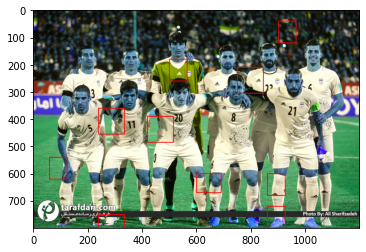

In [4]:
indexes = np.random.randint(0, len(windows), 10)
img = melli_img.copy()
for x in indexes: 
  i = windows[x]
  # print(i)
  # print(np.array(list(i).copy(), dtype = object)[2].shape)
  qqq = np.array(list(i).copy(), dtype = object)
  # cv2.imshow(np.array(list(i).copy(), dtype = object)[2])
  cv2.rectangle(img, (qqq[0], qqq[1]), (qqq[2], qqq[3]), (255, 0, 0), 2) # draw rectangle on image
  plt.imshow(np.array(img).astype('uint8'))
# show all windows
plt.show()

## **Read xml file of annotations**

In [5]:
import xml.etree.ElementTree as ET 
tree = ET.parse('Melli.xml') 
root = tree.getroot() 
data = []
boxes = []
for i in range(6, 17):
  data.append([root[i][0].text, root[i][4][0].text, root[i][4][1].text, root[i][4][2].text, root[i][4][3].text].copy())
  boxes.append([int(root[i][4][0].text), int(root[i][4][1].text), int(root[i][4][2].text), int(root[i][4][3].text)].copy())
df = pd.DataFrame(data) 
df.columns = ["Label", "xmin", "ymin", "xmax", "ymax"]
print(df)

   Label xmin ymin  xmax ymax
0   Face  145  273   217  372
1   Face  162  130   236  218
2   Face  321  132   398  226
3   Face  493   81   569  175
4   Face  677  125   749  226
5   Face  831  120   901  217
6   Face  994  104  1064  204
7   Face  315  255   389  364
8   Face  499  249   582  356
9   Face  710  234   781  334
10  Face  920  210   994  321


## **IOU Function**

In [6]:
def IOU(box, window):
    # مختصات ناحیه ی مشترک
    xmin = max(box[0], window[0])
    ymin = max(box[1], window[1])
    xmax = min(box[2], window[2])
    ymax = min(box[3], window[3])
    #مساحت ناحیه
    x = max(xmax - xmin, 0)
    y = max((ymax - ymin), 0)
    i = abs(x * y)
    if i == 0:
        return 0
    #اجتماع ناحیه ها
    #اجتماع = جمع دو مجموعه -اشتراک دو مجموعه
    x1 = (box[2] - box[0])
    y1 = (box[3] - box[1])
    s1 = abs(x1 * y1)
    x2 = window[2] - window[0]
    y2 = window[3] - window[1]
    s2 = abs(x2 * y2)
    u = s1 + s2 - i
    iou = i / float(u)
    return iou

## **Find Label of windows**

In [10]:
Hightreshold = 0.5
Lowtreshold = 0.3
Labels = []
for window in windows:
  max_iou = 0
  for box in boxes:
    h = IOU(box, window)
    if h > max_iou:
      max_iou = h
  if max_iou > Hightreshold:
    Labels.append(["Face", window].copy())
  elif max_iou < Lowtreshold:
    Labels.append(["BackGround", window].copy())


# **Result**

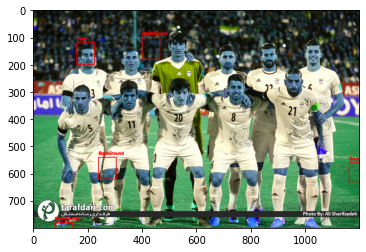

In [61]:
indexes2 = np.random.randint(0, len(Labels), 5)
final = melli_img.copy()
for x in indexes2: 
  i = Labels[x][1]
  # print(i)
  # print(np.array(list(i).copy(), dtype = object)[2].shape)
  qqq = np.array(list(i).copy(), dtype = object)
  # cv2.imshow(np.array(list(i).copy(), dtype = object)[2])
  cv2.rectangle(final, (qqq[0], qqq[1]), (qqq[2], qqq[3]), (255, 0, 0), 2) # draw rectangle on image
  # cv2. putText()
  cv2.putText(final, Labels[x][0], (qqq[0], qqq[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
  plt.imshow(np.array(final).astype('uint8'))
# show all windows
plt.show()

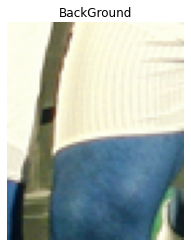

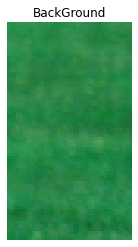

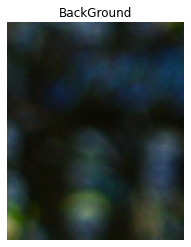

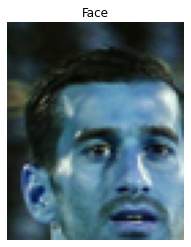

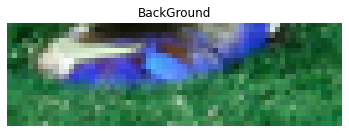

In [62]:
from google.colab.patches import cv2_imshow

for x in indexes2: 
  i = Labels[x][1]
  # print(i)
  # print(np.array(list(i).copy(), dtype = object)[2].shape)
  im = np.array(melli_img[i[1]:i[3], i[0]:i[2]])
  # print(melli_img.shape)
  plt.imshow(im)
  plt.title(Labels[x][0])
  plt.axis("off")
  plt.show()

plt.show()

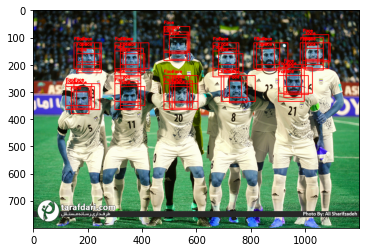

In [53]:
def find_indices(array, elem):
    indx = []
    for idx, value in enumerate(array):
        if value[0] == elem:
            indx.append(idx)
    return indx
Face_index = find_indices(Labels, "Face")
final2 = melli_img.copy()
for x in Face_index: 
  i = Labels[x][1]
  qqq = np.array(list(i).copy(), dtype = object)
  cv2.rectangle(final2, (qqq[0], qqq[1]), (qqq[2], qqq[3]), (255, 0, 0), 2) # draw rectangle on image
  cv2.putText(final2, Labels[x][0], (qqq[0], qqq[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
  plt.imshow(np.array(final2).astype('uint8'))
plt.show()